In [30]:
import networkx as nx
import pandas as pd
import numpy as np
import tqdm
import plotly.express as px
import plotly.graph_objects as go

In [33]:
PATH = '../data/durecdial/'
FILE = 'train_sent_sep.csv'

In [34]:
df = pd.read_csv(PATH + FILE)

## 대화를 그래프로 표현

In [31]:
def deny(num):
    if num<3:
        return True
    else:
        return False
    
def preprocess(df):
    '''
    dataframe에서 draw_graph에서 필요한 부분만 추출하는 함수
    '''
    temp_df = df[['user_id', 'sentiment_star', 'is_user']].copy()
    temp_df['deny'] = temp_df.sentiment_star.apply(deny)
    temp_df.drop(columns='sentiment_star', inplace=True)
    return temp_df

In [48]:
def draw_graph(df, user_id, with_labels = False, node_size = 400, width = 2, style = None, draw = True, retrun_graph = False):
    '''
    with_labels : node에 index 표시
    node_size : node 크기
    width : edge 두께
    style : 그래프 스타일 ('circular', 'spectral', 'kamada_kawai', 'planar', 'spring', 'shell')
    draw : 그래프 표시
    return_graph : 반환 값을 graph로 변경. False일 시 대화 시작부터 종료까지 길이를 반환
    '''
    G = nx.Graph()

    color_map = []
    before = 0
    flag = False
    cdf = df[df.user_id == user_id]

    for i in range(cdf.shape[0]):
        log = cdf.iloc[i]
        if log.is_user:
            color_map.append('blue')
        else:
            color_map.append('red')
        G.add_node(i)
        if i == 0:
            continue
        if log.is_user:
            G.add_edge(i, i - 1)
            if log.deny:
                flag = True
            else:
                flag = False
                before = i 
        else:
            if flag:
                G.add_edge(i, before)
            else:
                G.add_edge(i, i - 1)
    color_map[0], color_map[-1] = 'black', 'gray'

    pos = nx.spring_layout(G)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        text=list(cdf.sentence),
        hoverinfo='text',
        marker=dict(
            color = color_map,
            showscale = False,
            size = 10,
            line_width = 2))

    # layout
    layout = dict(plot_bgcolor='white',
                  paper_bgcolor='white',
                  margin=dict(t=10, b=10, l=10, r=10, pad=0),
                  showlegend = False,
                  xaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True),
                  yaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True))
    
    # figure
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    f = go.FigureWidget(fig)
    
    return f

    # if draw:
    #     fig.show()
    # conversation_length = list(nx.shortest_simple_paths(G, 0, cdf.shape[0]-1))[0].__len__()

    # if retrun_graph:
    #     return G
    # return conversation_length

In [47]:
df = pd.read_csv(PATH + 'train_user_small.csv')
draw_graph(df, 0, style='kamada_kawai')

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 0.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': 'd09e0a72-206f-499c-9bc9-3d9434c00228',
              'x': [-0.4908065602818539, -0.36039291634125004, None,
                    -0.36039291634125004, -0.1941696149572007, None,
                    -0.1941696149572007, -0.021747849262604597, None,
                    -0.021747849262604597, 0.12270001511164595, None,
                    0.12270001511164595, 0.22043176413798105, None,
                    0.22043176413798105, 0.25410556811078655, None,
                    0.25410556811078655, 0.21897394646457183, None,
                    0.21897394646457183, 0.13802881311434773, None,
                    0.13802881311434773, -0.04347315396254509, None,
                    0.13802881311434773, 0.14649585634537468, None,
                    -0.04347315396254509, -0.20064416379418026, None,
             

In [83]:
prep_df = preprocess(df)
draw_graph(prep_df, 0, style='kamada_kawai')

12

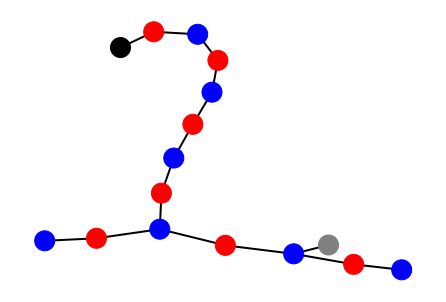

12

In [5]:
prep_df = preprocess(df)
draw_graph(prep_df, 0)

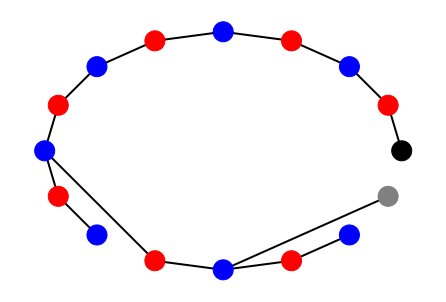

12

In [8]:
draw_graph(prep_df, 0, style='circular')
# nx.draw_circular(G, **options)
# plt.show()

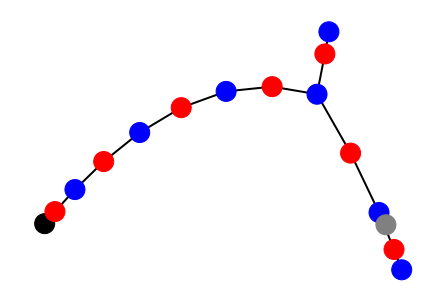

12

In [9]:
draw_graph(prep_df, 0, style='spectral')
# nx.draw_spectral(G, **options)
# plt.show()

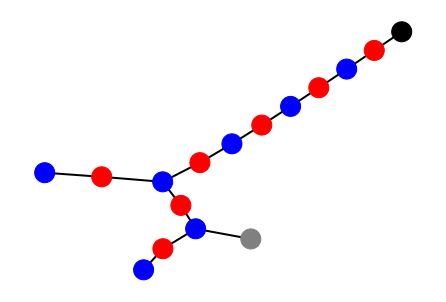

12

In [10]:
draw_graph(prep_df, 0, style='kamada_kawai')
# nx.draw_kamada_kawai(G, **options)
# plt.show()

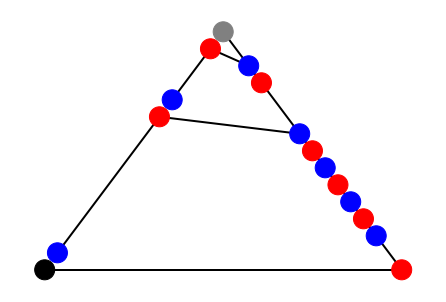

12

In [11]:
draw_graph(prep_df, 0, style='planar')
# nx.draw_planar(G, **options)
# plt.show()

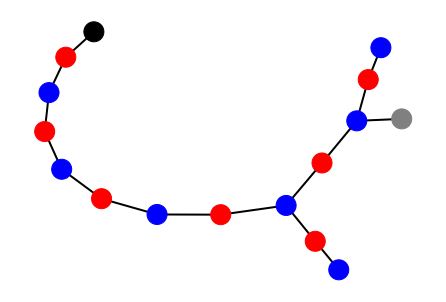

12

In [12]:
draw_graph(prep_df, 0, style='spring')
# nx.draw_spring(G, **options)
# plt.show()

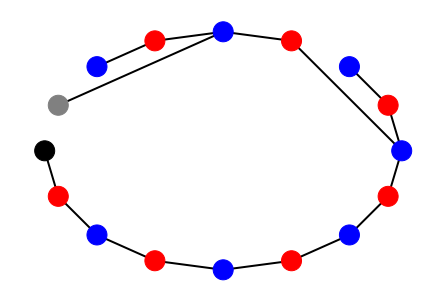

12

In [13]:
draw_graph(prep_df, 0, style='shell')
# nx.draw_shell(G, **options)
# plt.show()

## 유효 대화 길이 / 전체 대화 길이 생성

In [13]:
sig_conversation_length_dict = {i:draw_graph(prep_df, i, draw=False) for i in prep_df.user_id.unique()}
conversation_length = prep_df.groupby(by='user_id').count().is_user

In [19]:
df['sig_conv_len'] = prep_df.user_id.apply(lambda x:sig_conversation_length_dict[x])

0        12
1        12
2        12
3        12
4        12
         ..
87281    18
87282    18
87283    18
87284    18
87285    18
Name: user_id, Length: 87286, dtype: int64

In [33]:
sig_percent = {i:sig_conversation_length_dict[i]/conversation_length[i] for i in prep_df.user_id.unique()}
sig_percent

{0: 0.75,
 1: 1.0,
 2: 0.8571428571428571,
 3: 0.8888888888888888,
 4: 0.875,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 0.875,
 9: 1.0,
 10: 1.0,
 11: 0.8888888888888888,
 12: 0.8666666666666667,
 13: 1.0,
 14: 0.8571428571428571,
 15: 0.8,
 16: 1.0,
 17: 1.0,
 18: 0.8181818181818182,
 19: 0.8333333333333334,
 20: 0.875,
 21: 0.8571428571428571,
 22: 1.0,
 23: 0.8666666666666667,
 24: 1.0,
 25: 0.8,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 0.875,
 31: 0.8823529411764706,
 32: 0.6666666666666666,
 33: 1.0,
 34: 0.875,
 35: 1.0,
 36: 0.8333333333333334,
 37: 0.9166666666666666,
 38: 0.875,
 39: 0.8571428571428571,
 40: 0.875,
 41: 1.0,
 42: 0.875,
 43: 0.9375,
 44: 0.8571428571428571,
 45: 0.6666666666666666,
 46: 1.0,
 47: 1.0,
 48: 1.0,
 49: 1.0,
 50: 1.0,
 51: 0.9411764705882353,
 52: 1.0,
 53: 0.75,
 54: 0.875,
 55: 1.0,
 56: 0.8333333333333334,
 57: 0.8823529411764706,
 58: 0.7142857142857143,
 59: 1.0,
 60: 0.7777777777777778,
 61: 1.0,
 62: 0.8823529411764706,
 63: 1.0,
 64: 0.75,
 65: 0

In [34]:
df['sig_percent'] = prep_df.user_id.apply(lambda x:sig_percent[x])

<Axes: >

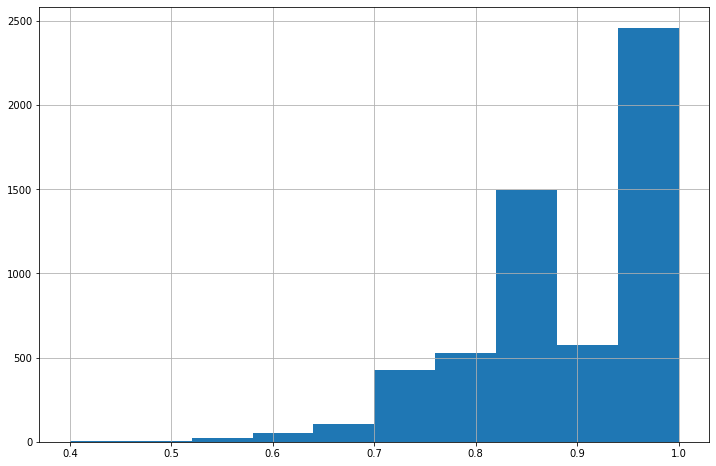

In [39]:
pd.Series(sig_percent).hist(bins=10, figsize=(12,8))

## Precision, P@K 생성

In [17]:
df['deny'] = df.sentiment_star.apply(deny)

In [7]:
df.columns

Index(['Unnamed: 0', 'user_id', 'user_profile_age_range', 'user_profile_name',
       'user_profile_residence', 'user_profile_accepted_food',
       'user_profile_accepted_movies', 'user_profile_accepted_music',
       'user_profile_rejected_music', 'user_profile_gender',
       'user_profile_accepted_celebrities', 'user_profile_accepted_movie',
       'user_profile_reject', 'user_profile_rejected_movies',
       'user_profile_occupation', 'user_profile_accepted_music.1',
       'user_profile_accepted_poi', 'user_profile_favorite_news',
       'user_profile_accepted_news', 'user_profile_poi', 'time', 'place',
       'date', 'topic', 'wday', 'sentence_index', 'sentence', 'goal_topic',
       'goal_type', 'knowledge', 'recdial', 'sentiment_star',
       'sentiment_score', 'is_bot_talk_first', 'is_user'],
      dtype='object')

In [24]:
# 추천 대화가 0건인 경우 제외
rec_list = []
for i in df.user_id.unique():
    if df[(df.recdial) & (df.user_id == i) & (df.is_user)].shape[0]:
        rec_list.append(i)

In [57]:
def precision(df, uid):
    tdf = df.copy()
    tdf = tdf[tdf.user_id == uid]
    prec = 1 - sum(tdf.deny) / tdf.shape[0]
    return prec

In [59]:
tdf = df[['user_id', 'recdial', 'sentence', 'recdial', 'sentiment_star', 'is_user', 'deny']].copy()
tdf = tdf[(df.recdial == 1) & (df.is_user)]

precisions = {i:precision(tdf, i) for i in rec_list}

In [65]:
# mean precision
sum(precisions.values())/len(rec_list)

0.7468704862782831

<Axes: >

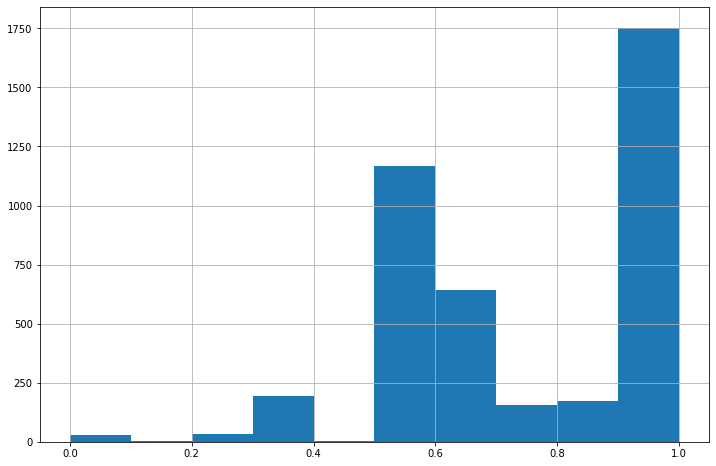

In [67]:
# precision hist
pd.Series(precisions).hist(bins=10, figsize=(12,8))

In [87]:
fig = px.bar(pd.Series(precisions).value_counts(), y='count')
fig.show()

In [70]:
rec_len_list = [len(tdf[tdf.user_id == i]) for i in rec_list]

In [75]:
pd.Series(rec_len_list).value_counts()

2    2171
3    1106
4     428
6     356
5      61
1      19
7      13
Name: count, dtype: int64

In [77]:
# 추천 대화 길이가 3이하인 비율
(2171+1106+19) / rec_list.__len__() * 100

79.34520943668753

In [89]:
def precision_K(df, K, uid):
    tdf = df.copy()
    tdf = tdf[(tdf.user_id == uid) & (tdf.is_user)]
    if tdf.shape[0] <= K:
        prec_k = 1 - sum(tdf.deny) / tdf.shape[0]
    else:
        prec_k = 1 - sum(tdf.iloc[:K].deny) / K
    return prec_k

In [ ]:
users = df.user_id.unique()

for i in tqdm(range(1,10)):
    exec(f'precision_{i} = {{i:precision_K(df,{i}, i) for i in users}}')


## CSV 나누기

In [120]:
df.columns

Index(['Unnamed: 0', 'user_id', 'user_profile_age_range', 'user_profile_name',
       'user_profile_residence', 'user_profile_accepted_food',
       'user_profile_accepted_movies', 'user_profile_accepted_music',
       'user_profile_rejected_music', 'user_profile_gender',
       'user_profile_accepted_celebrities', 'user_profile_accepted_movie',
       'user_profile_reject', 'user_profile_rejected_movies',
       'user_profile_occupation', 'user_profile_accepted_music.1',
       'user_profile_accepted_poi', 'user_profile_favorite_news',
       'user_profile_accepted_news', 'user_profile_poi', 'time', 'place',
       'date', 'topic', 'wday', 'sentence_index', 'sentence', 'goal_topic',
       'goal_type', 'knowledge', 'recdial', 'sentiment_star',
       'sentiment_score', 'is_bot_talk_first', 'is_user', 'deny'],
      dtype='object')

In [122]:
df[(df.user_id == 1) & (df.recdial)][['user_profile_accepted_food', 'user_profile_accepted_movies', 'user_profile_accepted_music', 'user_profile_accepted_celebrities', 'user_profile_accepted_movie','goal_topic','goal_type','is_user', 'deny']]

,user_profile_accepted_food,user_profile_accepted_movies,user_profile_accepted_music,user_profile_accepted_celebrities,user_profile_accepted_movie,goal_topic,goal_type,is_user,deny
19,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Marinated Fish,Food recommendation,0,False
20,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Marinated Fish,Food recommendation,1,False
21,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Marinated Fish,Food recommendation,0,False
22,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Marinated Fish,Food recommendation,1,False
23,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Mr.Fish Roasted,POI recommendation,0,False
24,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Mr.Fish Roasted,POI recommendation,1,False
25,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Mr.Fish Roasted,POI recommendation,0,True
26,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Mr.Fish Roasted,POI recommendation,1,False
27,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...",['Jacky Cheung'],NaN,Mr.Fish Roasted,POI recommendation,0,False


In [123]:
pd.read_csv(PATH + 'train_user.csv')

,user_id,user_profile_age_range,user_profile_name,user_profile_residence,user_profile_accepted_food,user_profile_accepted_movies,user_profile_accepted_music,user_profile_rejected_music,user_profile_gender,user_profile_accepted_celebrities,user_profile_accepted_movie,user_profile_reject,user_profile_rejected_movies,user_profile_occupation,user_profile_accepted_music.1,user_profile_accepted_poi,user_profile_favorite_news,user_profile_accepted_news,user_profile_poi
0,0,Under 18 years old,Fangyang Liu,Qingdao,Jiaozi Stuffed with Mackerel,"['Left Right Love Destiny', 'Hot Summer Days',...",['Once'],['Its Time'],Female,"['Cecilia Cheung', 'Kris Wu', 'Nicholas Tse']",The Legend of Speed,News,"['Everyday is Valentine', 'Unforgettable', 'Ki...",Student,Time Boils The Rain,Minguo Seafood Dumpling House,NaN,NaN,NaN
1,1,Under 18 years old,Mingzheng Li,Hengshui,Marinated Fish,NaN,"['You Will Always Be My Love', 'After Leaving'...","['Coffee', 'be torn with grief']",Male,['Jacky Cheung'],NaN,Movie,NaN,Student,Wolf Legend,Mr.Fish Roasted,['Jacky Cheungs news'],NaN,NaN
2,2,Over 50 years old,Li Xu,Yangzhou,Marinated Fish,"['Tiles of Deception', 'Lurid Affections: The ...","['A Simple Song', 'Heroes of Earth']",['KISS GOODBYE'],Male,"['Bingbing Fan', 'Leehom Wang']",Flash Point,Poi,"['Lust', 'Caution']",Employed,Hand in Hand,NaN,"['Bingbing Fans news', 'Leehom Wangs news']",NaN,NaN
3,3,26-35,Jiaoyang Jin,Xining,Sautéed Spicy Pork,"['Flash Point', 'Sophies Revenge', 'I Am Not M...",NaN,NaN,Female,['Bingbing Fan'],Battle of Wits,music,['Ever Since We Love'],Student,NaN,Laoqi Sichuan Restaurant,['Bingbing Fans news'],NaN,NaN
4,4,7-10,Xinxi Zhang,Shijiazhuang,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,5673,Over 50 years old,Pinglu Liu,Kunming,poached spicy slices of pork,"['Shouldve Loved You', 'My Boyfriends']",['The Little Girl Under the Streetlight'],['I Love You Meilan'],Female,"['Na Xie', 'Jiong He']",Nanas Rose war,News,['Nanas War'],Retired,Little Love,Yicaiyige Classic Sichuan Dishes(Qicai Me Town...,NaN,NaN,NaN
5674,5674,Over 50 years old,Qinan He,Shanghai,Chicken Feet with Pickled Peppers,"['Mr. Peabody & Sherman', 'Mini-Bus', 'The Mir...","['The Garden', 'Dear Child', 'Innocence', 'Inv...","['Its Enough', 'Heartburn', 'A Branch of Plum ...",Male,"['Bo Huang', 'Jiong He']",No Mans Land,Poi,"['Happy Running', 'Crazy Racer']",Employed,Those Years,NaN,NaN,"['Bo Huangs news, Jiong Hes news']",NaN
5675,5675,Over 50 years old,Xiaofeng Niu,Chengdu,Kung Pao Chicken,"['Perfect Two', 'L.O.R.D（Legend of Ravaging Dy...",['Must Be Happy'],['Love Support'],Female,"['Mi Yang', 'Leehom Wang']",Reset,Poi,"['Alls Well', 'Ends Well 2012']",Employed,The Sun Washed by Spring Rain,NaN,NaN,"['Mi Yangs news, Leehom Wangs news']",NaN
5676,5676,18-25,Jiaoqian Yang,Xuzhou,Yu-Shiang Shredded Pork (Sautéed with Spicy Ga...,NaN,NaN,NaN,Female,"['Hsu Chi', 'Kris Wu']",Three Times,Poi,NaN,Student,Heaven & Earth,NaN,NaN,"['Hsu Chis news, Kris Wus news']",NaN


In [151]:
df_small = df.loc[df.user_id.isin(rec_list)].copy()
df_small.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [152]:
df_small.columns

Index(['user_id', 'user_profile_age_range', 'user_profile_name',
       'user_profile_residence', 'user_profile_accepted_food',
       'user_profile_accepted_movies', 'user_profile_accepted_music',
       'user_profile_rejected_music', 'user_profile_gender',
       'user_profile_accepted_celebrities', 'user_profile_accepted_movie',
       'user_profile_reject', 'user_profile_rejected_movies',
       'user_profile_occupation', 'user_profile_accepted_music.1',
       'user_profile_accepted_poi', 'user_profile_favorite_news',
       'user_profile_accepted_news', 'user_profile_poi', 'time', 'place',
       'date', 'topic', 'wday', 'sentence_index', 'sentence', 'goal_topic',
       'goal_type', 'knowledge', 'recdial', 'sentiment_star',
       'sentiment_score', 'is_bot_talk_first', 'is_user', 'deny'],
      dtype='object')

In [179]:
profiles = ['user_profile_age_range', 'user_profile_name',
       'user_profile_residence', 'user_profile_accepted_food',
       'user_profile_accepted_movies', 'user_profile_accepted_music',
       'user_profile_rejected_music', 'user_profile_gender',
       'user_profile_accepted_celebrities', 'user_profile_accepted_movie',
       'user_profile_reject', 'user_profile_rejected_movies',
       'user_profile_occupation', 'user_profile_accepted_music.1',
       'user_profile_accepted_poi', 'user_profile_favorite_news',
       'user_profile_accepted_news', 'user_profile_poi']

sentence = ['time', 'place',
       'date', 'topic', 'wday', 'sentence_index', 'sentence', 'goal_topic',
       'goal_type', 'knowledge', 'recdial', 'sentiment_star',
       'sentiment_score', 'is_bot_talk_first', 'is_user', 'deny']

In [154]:
train_user_small = df_small[['user_id', *profiles]].drop_duplicates()
train_sentence_small = df_small[['user_id', *sentence]]

In [171]:
train_user_small['precision'] = train_user_small.user_id.apply(lambda x:precisions[x])
for i in range(1,10):
    exec(f'train_user_small[\'precision_{i}\'] = train_user_small.user_id.apply(lambda x:precision_{i}[x])')

In [185]:
train_user_small.to_csv(PATH + 'train_user_small.csv', index=False)
train_sentence_small.to_csv(PATH + 'train_sentence_small.csv', index=False)

## 모델 성능 csv 만들기
https://github.com/RUCAIBox/CRSLab/

In [9]:
rec_data = {'Model': ['SASRec', 'TextCNN', 'BERT', 'KBRD', 'KGSF', 'TG-ReDial'],
        'Hit@1': [0.000446, 0.00267, 0.00722, 0.00401, 0.00535, 0.00793],
        'Hit@10': [0.00134, 0.0103, 0.00490, 0.0254, 0.0285, 0.0251],
        'Hit@50': [0.0160, 0.0236, 0.0281, 0.0588, 0.0771, 0.0524],
        'MRR@1': [0.000446, 0.00267, 0.00722, 0.00401, 0.00535, 0.00793],
        'MRR@10': [0.000576, 0.00434, 0.0106, 0.00891, 0.0114, 0.0122],
        'MRR@50': [0.00114, 0.00493, 0.0124, 0.0103, 0.0135, 0.0134],
        'NDCG@1': [0.000445, 0.00267, 0.00490, 0.00401, 0.00535, 0.00793],
        'NDCG@10': [0.00075, 0.00570, 0.0147, 0.0127, 0.0154, 0.0152],
        'NDCG@50': [0.00380, 0.00860, 0.0239, 0.0198, 0.0259, 0.0211]}

rec_df = pd.DataFrame(rec_data)
rec_df['Recommendation'] = 1
rec_df

,Model,Hit@1,Hit@10,Hit@50,MRR@1,MRR@10,MRR@50,NDCG@1,NDCG@10,NDCG@50,Recommendation
0,SASRec,0.000446,0.00134,0.0160,0.000446,0.000576,0.00114,0.000445,0.00075,0.0038,1
1,TextCNN,0.002670,0.01030,0.0236,0.002670,0.004340,0.00493,0.002670,0.00570,0.0086,1
2,BERT,0.007220,0.00490,0.0281,0.007220,0.010600,0.01240,0.004900,0.01470,0.0239,1
3,KBRD,0.004010,0.02540,0.0588,0.004010,0.008910,0.01030,0.004010,0.01270,0.0198,1
4,KGSF,0.005350,0.02850,0.0771,0.005350,0.011400,0.01350,0.005350,0.01540,0.0259,1
5,TG-ReDial,0.007930,0.02510,0.0524,0.007930,0.012200,0.01340,0.007930,0.01520,0.0211,1


In [10]:
conv_data = {'Model': ['HERD', 'Transformer', 'GPT2', 'KBRD', 'KGSF', 'TG-ReDial'],
        'BLEU@1': [0.120, 0.266, 0.0858, 0.267, 0.383, 0.125],
        'BLEU@2': [0.0141, 0.0440, 0.0119, 0.0458, 0.115, 0.0204],
        'BLEU@3': [0.00136, 0.0145, 0.00377, 0.0134, 0.0444, 0.00354],
        'BLEU@4': [0.000350, 0.00651, 0.0110, 0.00579, 0.0200, 0.000803],
        'Dist@1': [0.181, 0.324, 2.35, 0.469, 0.340, 0.881],
        'Dist@2': [0.369, 0.837, 4.62, 1.50, 0.910, 1.75],
        'Dist@3': [0.847, 2.02, 8.84, 3.40, 3.50, 7.00],
        'Dist@4': [1.30, 3.06, 12.5, 4.90, 6.20, 12.0],
        'Average': [0.697, 0.879, 0.763, 0.863, 0.888, 0.810],
        'Extreme': [0.382, 0.438, 0.297, 0.398, 0.477, 0.332],
        'Greedy': [0.639, 0.680, 0.583, 0.710, 0.767, 0.598],
        'PPL': [472, 30.9, 9.26, 52.5, 50.1, 7.41]}

conv_df = pd.DataFrame(conv_data)
conv_df['Conversation'] = 1
conv_df

,Model,BLEU@1,BLEU@2,BLEU@3,BLEU@4,Dist@1,Dist@2,Dist@3,Dist@4,Average,Extreme,Greedy,PPL,Conversation
0,HERD,0.1200,0.0141,0.00136,0.000350,0.181,0.369,0.847,1.30,0.697,0.382,0.639,472.00,1
1,Transformer,0.2660,0.0440,0.01450,0.006510,0.324,0.837,2.020,3.06,0.879,0.438,0.680,30.90,1
2,GPT2,0.0858,0.0119,0.00377,0.011000,2.350,4.620,8.840,12.50,0.763,0.297,0.583,9.26,1
3,KBRD,0.2670,0.0458,0.01340,0.005790,0.469,1.500,3.400,4.90,0.863,0.398,0.710,52.50,1
4,KGSF,0.3830,0.1150,0.04440,0.020000,0.340,0.910,3.500,6.20,0.888,0.477,0.767,50.10,1
5,TG-ReDial,0.1250,0.0204,0.00354,0.000803,0.881,1.750,7.000,12.00,0.810,0.332,0.598,7.41,1


In [11]:
pol_data = {'Model': ['MGCG', 'Conv-BERT', 'Topic-BERT', 'TG-ReDial'],
        'Hit@1': [0.591, 0.597, 0.598, 0.600],
        'Hit@10': [0.818, 0.814, 0.828, 0.830],
        'Hit@50': [0.883, 0.881, 0.885, 0.893],
        'MRR@1': [0.591, 0.597, 0.598, 0.600],
        'MRR@10': [0.680, 0.684, 0.690, 0.693],
        'MRR@50': [0.683, 0.687, 0.693, 0.696],
        'NDCG@1': [0.591, 0.597, 0.598, 0.600],
        'NDCG@10': [0.712, 0.716, 0.724, 0.727],
        'NDCG@50': [0.729, 0.731, 0.737, 0.741]}

pol_df = pd.DataFrame(pol_data)
pol_df['Policy'] = 1

In [18]:
df = rec_df.merge(conv_df, on='Model', how='outer')
# df = df.merge(pol_df, on='Model', how='outer')
df

,Model,Hit@1,Hit@10,Hit@50,MRR@1,MRR@10,MRR@50,NDCG@1,NDCG@10,NDCG@50,...,BLEU@4,Dist@1,Dist@2,Dist@3,Dist@4,Average,Extreme,Greedy,PPL,Conversation
0,SASRec,0.000446,0.00134,0.0160,0.000446,0.000576,0.00114,0.000445,0.00075,0.0038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TextCNN,0.002670,0.01030,0.0236,0.002670,0.004340,0.00493,0.002670,0.00570,0.0086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BERT,0.007220,0.00490,0.0281,0.007220,0.010600,0.01240,0.004900,0.01470,0.0239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KBRD,0.004010,0.02540,0.0588,0.004010,0.008910,0.01030,0.004010,0.01270,0.0198,...,0.005790,0.469,1.500,3.400,4.90,0.863,0.398,0.710,52.50,1.0
4,KGSF,0.005350,0.02850,0.0771,0.005350,0.011400,0.01350,0.005350,0.01540,0.0259,...,0.020000,0.340,0.910,3.500,6.20,0.888,0.477,0.767,50.10,1.0
5,TG-ReDial,0.007930,0.02510,0.0524,0.007930,0.012200,0.01340,0.007930,0.01520,0.0211,...,0.000803,0.881,1.750,7.000,12.00,0.810,0.332,0.598,7.41,1.0
6,HERD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000350,0.181,0.369,0.847,1.30,0.697,0.382,0.639,472.00,1.0
7,Transformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006510,0.324,0.837,2.020,3.06,0.879,0.438,0.680,30.90,1.0
8,GPT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011000,2.350,4.620,8.840,12.50,0.763,0.297,0.583,9.26,1.0


In [21]:
df['Policy'] = 0

In [23]:
df = pd.concat([df, pol_df])

In [36]:
cols = list(df.columns)
col = (cols[:10] + cols[11:])
col.append(cols[10])

In [38]:
df = df[col]

In [39]:
df.to_csv(PATH + 'model_eval.csv', index=False)

In [40]:
df

,Model,Hit@1,Hit@10,Hit@50,MRR@1,MRR@10,MRR@50,NDCG@1,NDCG@10,NDCG@50,...,Dist@2,Dist@3,Dist@4,Average,Extreme,Greedy,PPL,Conversation,Policy,Recommendation
0,SASRec,0.000446,0.00134,0.0160,0.000446,0.000576,0.00114,0.000445,0.00075,0.0038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
1,TextCNN,0.002670,0.01030,0.0236,0.002670,0.004340,0.00493,0.002670,0.00570,0.0086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
2,BERT,0.007220,0.00490,0.0281,0.007220,0.010600,0.01240,0.004900,0.01470,0.0239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
3,KBRD,0.004010,0.02540,0.0588,0.004010,0.008910,0.01030,0.004010,0.01270,0.0198,...,1.500,3.400,4.90,0.863,0.398,0.710,52.50,1.0,0,1.0
4,KGSF,0.005350,0.02850,0.0771,0.005350,0.011400,0.01350,0.005350,0.01540,0.0259,...,0.910,3.500,6.20,0.888,0.477,0.767,50.10,1.0,0,1.0
5,TG-ReDial,0.007930,0.02510,0.0524,0.007930,0.012200,0.01340,0.007930,0.01520,0.0211,...,1.750,7.000,12.00,0.810,0.332,0.598,7.41,1.0,0,1.0
6,HERD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.369,0.847,1.30,0.697,0.382,0.639,472.00,1.0,0,NaN
7,Transformer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,2.020,3.06,0.879,0.438,0.680,30.90,1.0,0,NaN
8,GPT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.620,8.840,12.50,0.763,0.297,0.583,9.26,1.0,0,NaN
0,MGCG,0.591000,0.81800,0.8830,0.591000,0.680000,0.68300,0.591000,0.71200,0.7290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## df_small 재분류

In [84]:
sent_small.columns

Index(['user_id', 'sentence_index', 'sentence', 'goal_topic', 'goal_type',
       'knowledge', 'recdial', 'sentiment_star', 'sentiment_score',
       'is_bot_talk_first', 'is_user', 'deny'],
      dtype='object')

In [11]:
user_small = pd.read_csv(PATH + 'train_user_small.csv')
sent_small = pd.read_csv(PATH + 'train_sentence_small.csv')

In [ ]:
to_user = sent_small[sent_small.columns[:6]].drop_duplicates()
user_small = to_user.merge(user_small, on='user_id')
sent_small.drop(labels=sent_small.columns[1:6], axis=1, inplace=True)

In [80]:
sent_small.to_csv(PATH + 'train_sentence_small.csv', index=False)
user_small.to_csv(PATH + 'train_user_small.csv', index=False)

## small,xsmall 데이터 user_id 초기화

In [6]:
old_uid = user_small.user_id

In [10]:
uid_dict = {old_uid[i]:i for i in range(4154)}

In [14]:
user_small['user_id'] = user_small.user_id.apply(lambda x:uid_dict[x])
sent_small['user_id'] = sent_small.user_id.apply(lambda x:uid_dict[x])

In [17]:
sent_small.to_csv(PATH + 'train_sentence_small.csv', index=False)
user_small.to_csv(PATH + 'train_user_small.csv', index=False)

In [18]:
user_xs = pd.read_csv(PATH + 'train_user_xs.csv')
sent_xs = pd.read_csv(PATH + 'train_sentence_xs.csv')

In [20]:
old_uid_xs = user_xs.user_id
uid_dict_xs = {old_uid_xs[i]:i for i in range(user_xs.shape[0])}

In [21]:
user_xs['user_id'] = user_xs.user_id.apply(lambda x:uid_dict_xs[x])
sent_xs['user_id'] = sent_xs.user_id.apply(lambda x:uid_dict_xs[x])

In [28]:
sent_xs.drop(labels='index', axis=1, inplace=True)

In [29]:
sent_xs.to_csv(PATH + 'train_sentence_xs.csv', index=False)
user_xs.to_csv(PATH + 'train_user_xs.csv', index=False)